In [1]:
from __future__ import  division
from numpy import fft

Nf = 64              # N- DFT size
fs = 64              # sampling frequency
f = 10               # one signal
t = arange(0,1,1/fs) # time-domain samples
deltaf = 1/2.        # second nearby frequency

# keep x and y-axes on same respective scale
fig,ax = subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,3))

x=cos(2*pi*f*t) + cos(2*pi*(f+2)*t) # 2 Hz frequency difference
X = fft.fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,Nf),abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$ Hz, $T=1$ s',fontsize=18)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].grid()

x=cos(2*pi*f*t) + cos(2*pi*(f+deltaf)*t) # delta_f frequency difference
X = fft.fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,Nf),abs(X),'-o')
ax[1].set_title(r'$\delta f = 1/2$ Hz, $T=1$ s',fontsize=14)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

In the
top plot, we can clearly distinguish two tones separated by 2 Hz by
the magnitude of the DFT shown. However, 
when these tones are separated by only 0.5 Hz, we can no longer do so
 (bottom plot).

In [2]:
Nf = 64*2 # FFT size
fig,ax = subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft.fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.) # marker size=3
ax[0].set_title(r'$N=%d$, $T=1$s'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[0].grid()

Nf = 64*4 # FFT size
X = fft.fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$, $T=1$s'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax=fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

In the
top plot, we keep everything as before, but
increase the DFT length to $N=128$. Unfortunately,  we still
cannot clearly distinguish the two tones. Going up to
$N=256$ in the bottom plot does no better.

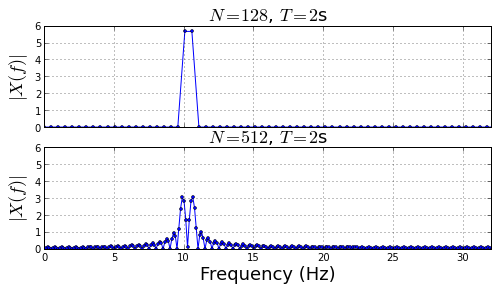

In [3]:
t = arange(0,2,1/fs)
x=cos(2*pi*f*t) + cos(2*pi*(f+deltaf)*t)

Nf = 64*2 # FFT size
fig,ax = subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))

X = fft.fft(x,Nf)/sqrt(Nf)
ax[0].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_title(r'$N=%d$, $T=2$s'%Nf,fontsize=18)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].grid()

Nf = 64*8 # FFT size
X = fft.fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_title(r'$N=%d$, $T=2$s'%Nf,fontsize=18)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

By
sampling through a longer duration, we can now distinguish
the two tones using a longer DFT (bottom plot), but still not so in
the top plot with the shorter DFT. Clearly, we need
both larger DFTs and longer sampling durations to resolve
these two nearby tones, not just longer DFTs.

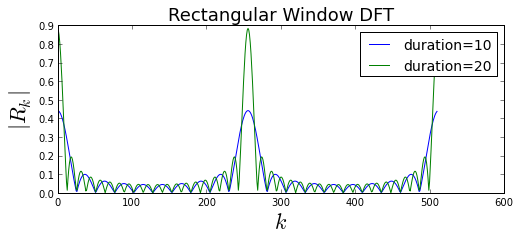

In [4]:
def abs_sinc(k=None,N=64,Ns=32):
    'absolute value of sinc'
    if k is None: k = arange(0,N-1)
    y = where(k == 0, 1.0e-20, k)
    return abs(sin(Ns*2*pi/N*y)/sin(2*pi*y/N))/sqrt(N)

fig,ax=subplots()
fig.set_size_inches((8,3))

ax.plot(abs_sinc(N=512,Ns=10),label='duration=10')
ax.plot(abs_sinc(N=512,Ns=20),label='duration=20')
ax.set_xlabel('$k$',fontsize=22)
ax.set_ylabel(r'$|R_k|$',fontsize=22)
ax.set_title('Rectangular Window DFT',fontsize=18)
ax.legend(loc=0,fontsize=14);

Note that the DFT grows taller and narrower as the rectangular window grows longer (i.e. sampling duration increases).   The amplitude growth occurs because the longer window accumulates more energy than the shorter window. Functionally, this appears in the argument of the sine function in the numerator of the sinc  equation. The length of the DFT is the same for both lines in figure, so only the length of the rectangular window varies. Looking at the  formula for the sinc, the null-to-null width of the mainlobe in frequency terms is the following


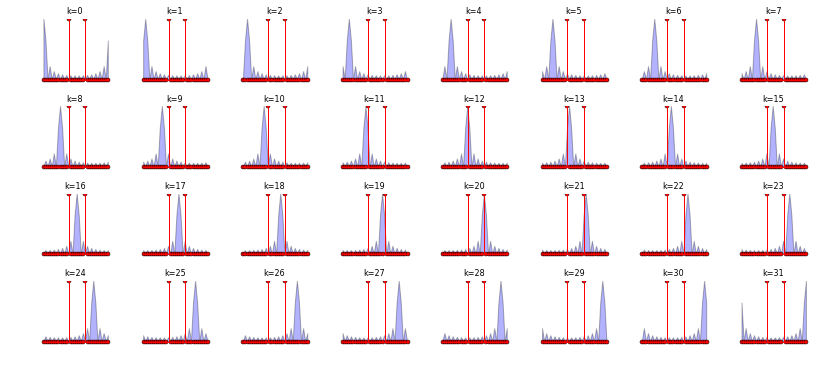

In [5]:
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    # use numpy broadcasting to create matrix
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) 
    return U/sqrt(Nfft)

Nf = 32 # DFT size
U = dftmatrix(Nf,Nf)
x = U[:,12].real      # input signal
X = U.H*x             # DFT of input
rect = ones((Nf/2,1)) # short rectangular window
z = x[:Nf/2] # product of rectangular window and x (i.e. chopped version of x) 
R = dftmatrix(Nf,Nf/2).H*rect # DFT of rectangular window
Z = dftmatrix(Nf,Nf/2).H*z    # DFT of product of x_n and r_n

# use numpy broadcasting to setup summand's indices
idx=arange(Nf)-arange(Nf)[:,None] 
idx[idx<0]+=Nf # add periodic Nf to negative indices for wraparound
a = arange(Nf) # k^th frequency index

fig,ax = subplots(4,8,sharex=True,sharey=True)
fig.set_size_inches((14,6))
for i,j in enumerate(ax.flat):
    j.fill_between(arange(Nf),1/sqrt(Nf)*abs(R[idx[:,i],0]).flat,0,alpha=0.3)
    # separate stem parts
    markerline, stemlines, baseline =j.stem(arange(Nf),abs(X))
    setp(markerline, 'markersize', 4.)
    setp(markerline,'markerfacecolor','r')
    setp(stemlines,'color','r')
    j.axis('off')
    j.set_title('k=%d'%i,fontsize=8)

Figure shows the rectangular window DFT in blue, $R_k$ against the sinusoid  input signal in red, $X_k$,  for each value of $k$ as the two terms slide past each other from left to right, top to bottom. In other words, the $k^{th}$ term in $Z_k$, the DFT of the product $x_n r_n $, can be thought of as the inner-product of the red and blue lines. This is not *exactly* true because we are just plotting magnitudes and not the real/imaginary parts, but it's enough to understand the mechanics of the circular convolution.

The best way to think about the rectangular window's sinc-shaped DFT as it slides past the input signal is as a *probe* with a resolution defined by its mainlobe width. For example, in frame $k=12$, we see that the peak of the rectangular window coincides with the peak of the input frequency so we should expect a large value for $Z_{k=12}$. However, if the rectangular window were shorter, corresponding to a wider mainlobe, then two nearby frequencies would be draped in the same mainlobe and would then be indistinguishable in the resulting inner-product of the two overlapping graphs.


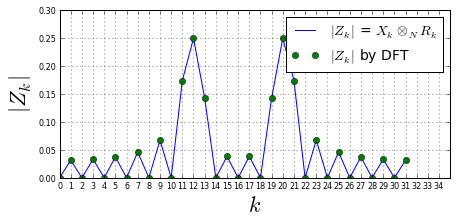

In [6]:
fig,ax=subplots()
fig.set_size_inches((7,3))
ax.plot(a,abs(R[idx,0]*X)/sqrt(Nf),label=r'$|Z_k|$ = $X_k\otimes_N R_k$')
ax.plot(a,abs(Z),'o',label=r'$|Z_k|$ by DFT')
ax.set_xlabel('$k$',fontsize=22)
ax.set_ylabel(r'$|Z_k|$',fontsize=22)
ax.set_xticks(arange(ax.get_xticks().max()))
ax.tick_params(labelsize=8)
ax.legend(loc=0,fontsize=14)
ax.grid()

Some setup code for later:

In [7]:
from scipy import signal
from numpy import fft
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/sqrt(Nfft)

def db20(W,Nfft=None):
    'Given DFT, return power level in dB'
    if Nfft is None: # assume W is DFT 
        return 20*log10(abs(W))
    else: # assume time-domain passed, so need DFT
        DFT= fft.fft(array(W).flatten(),Nfft)/sqrt(Nfft)
        return 20*log10(abs(DFT.flatten()))

The `subplots_adjust` function tweaks the subplot layout by changing the horizontal/vertical whitespace and relative positions of the subplot elements.

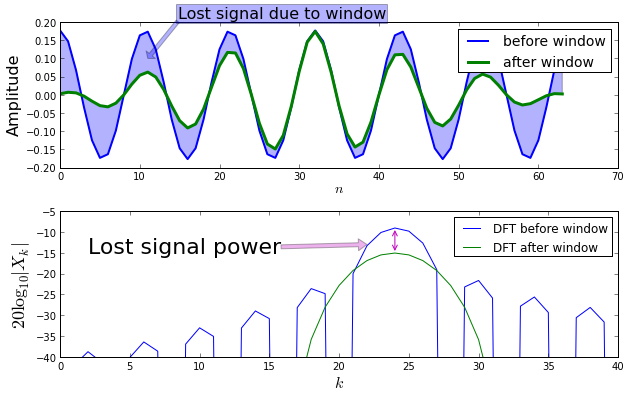

In [8]:
U=dftmatrix(64) 
u=U[:,6].real*sqrt(2) # create test sinusoid
fo = 2*pi/64*6 # in radians/sec
nz=randn(64,1) # noise samples
w=signal.triang(64) # window function

fig,ax= subplots(2,1)
fig.set_size_inches((10,6))
subplots_adjust(hspace=.3)
n = arange(len(u))
ax[0].plot(n,u.real,label='before window',lw=2)
ax[0].set_ylabel('Amplitude',fontsize=16)
ax[0].plot(n,diag(w)*u.real,label='after window',lw=3.)
ax[0].fill_between(n,array(u).flat, array(diag(w)*u).flat,alpha=0.3)
ax[0].legend(loc=0,fontsize=14)
ax[0].set_xlabel('$n$',fontsize=14)
ax[0].annotate('Lost signal due to window',
                fontsize=16, 
                bbox={'fc':'b','alpha':.3}, # alpha is transparency
                xy=(11,0.1),
                xytext=(30,40), 
                textcoords='offset points', # coordinate system for xytext
                arrowprops={'facecolor':'b','alpha':.3})

N=256 # DFT size for plot
idx = int(fo/(2*pi/N))
ax[1].plot(db20(u,N),label='DFT before window')
ax[1].plot(db20(diag(w)*u,N),label='DFT after window')
ax[1].set_ylim(ymin=-40,ymax=-5)
ax[1].set_xlim(xmax=40)
ax[1].set_ylabel(r'$20\log_{10}|X_k|$',fontsize=18)
ax[1].set_xlabel(r'$k$',fontsize=16)
ax[1].annotate('Lost signal power',
                fontsize=22,
                xy=(22,-13),
                xytext=(2,-15),
                arrowprops={'facecolor':'m','alpha':.3})
pkU = db20(u,N)[idx]
pkW = db20(diag(w)*u,N)[idx]
ax[1].annotate('',xy=(idx,pkW),
               xytext=(idx,pkU),
               fontsize=12,
               arrowprops={'arrowstyle':'<->','color':'m'})
ax[1].legend(loc=0,fontsize=12)

The shaded
region in the top plot shows the signal attenuated by the window
resulting in a loss of signal energy. The same loss is shown in the
bottom plot using the DFT.

(0.0, 0.037499999999999992)

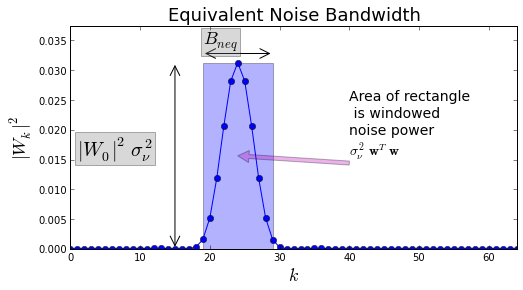

In [9]:
from matplotlib.patches import Rectangle

fig,ax = subplots()
fig.set_size_inches((8,4))

N = 256 # DFT size
idx = int(fo/(2*pi/N))
Xm = abs(fft.fft(array(diag(w)*u).flatten(),N)/sqrt(N))**2
ax.plot(Xm,'-o')
ax.add_patch(Rectangle((idx-10/2,0),width=10,height=Xm[idx],alpha=0.3))
ax.set_xlim(xmax = N/4)
ax.set_ylabel(r'$|W_k|^2$',fontsize=18)
ax.set_xlabel(r'$k$',fontsize=18)
ax.set_title('Equivalent Noise Bandwidth',fontsize=18)
ax.annotate('Area of rectangle\n is windowed\nnoise power\n'+r'$\sigma_\nu^2 \mathbf{w}^T \mathbf{w}$',
            fontsize=14,
            xy=(idx,Xm.max()/2.),
            xytext=(40,Xm.max()/2.),
            arrowprops={'facecolor':'m','alpha':.3});
ax.annotate('',ha='center',fontsize=24,
             xy=(idx+10/2,Xm.max()*1.05),
             xytext=(idx-10/2,Xm.max()*1.05),
             arrowprops=dict(arrowstyle='<->'))
ax.annotate('',ha='center',fontsize=24,
             xy=(15,0),
             xytext=(15,Xm.max()),
             arrowprops=dict(arrowstyle='<->'))
ax.text( 1, Xm.max()/2,r'$ |W_0|^2\sigma_\nu^2 $',fontsize=20,bbox={'fc':'gray','alpha':.3})
ax.text( idx-5, Xm.max()*1.1,r'$B_{neq}$',fontsize=18,bbox={'fc':'gray','alpha':.3})
ax.set_ylim(ymax = Xm.max()*1.2)

Another way to understand window functions in terms of noise is to evaluate windows in terms of the amount of noise they *pass* through the mainlobe. Figure illustrates this concept.  Figure shows the squared DFT of the window with the overlaid rectangle showing the idealized bandpass filter that would pass the same amount of noise power at the peak of the window's DFT. It's as if all the noise was packed into a rectangle centered at the peak of the mainlobe. This is the *Equivalent Noise Bandwidth* (ENBW) concept

(-1, 18.0)

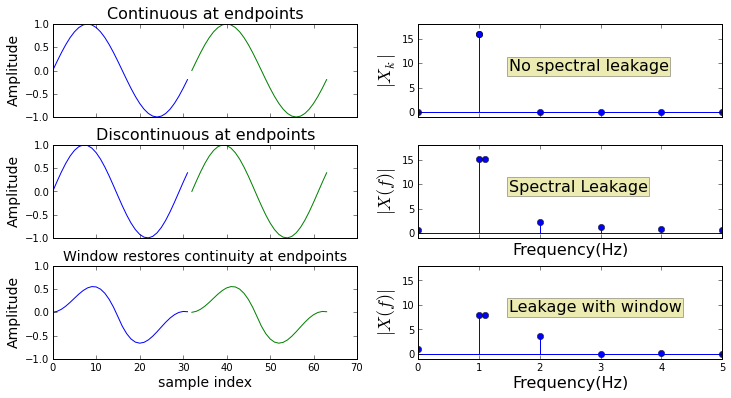

In [10]:
from scipy import signal

fo = 1 # signal frequency
fs = 32 # sample frequency
Ns = 32 # number of samples
x = sin(2*pi*fo/fs*arange(Ns)) # sampled signal
fig,axs= subplots(3,2,sharex='col',sharey='col')
fig.set_size_inches((12,6))
subplots_adjust(hspace=.3)

ax=axs[0,0]
ax.plot(arange(Ns),x,label='signal')
ax.plot(arange(Ns)+Ns,x,label='extension')
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Continuous at endpoints',fontsize=16)

ax=axs[0,1]
N=Ns  #chosen so DFT bin is exactly on fo
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')
ax.set_ylabel(r'$|X_k|$',fontsize=18)
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)
ax.text(0.3,0.5,'No spectral leakage',fontsize=16,
        transform=ax.transAxes,
        bbox={'fc':'y','alpha':.3})

fo = 1.1                       # signal frequency
x = sin(2*pi*fo/fs*arange(Ns)) # sampled signal

ax=axs[1,0]
ax.plot(arange(Ns),x,label='signal')
ax.plot(arange(Ns)+Ns,x,label='extension')
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Discontinuous at endpoints',fontsize=16)

ax=axs[1,1]
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')
ax.set_xlabel('Frequency(Hz)',fontsize=16)
ax.set_ylabel(r'$|X(f)|$',fontsize=18)
ax.text(0.3,0.5,'Spectral Leakage',fontsize=16,
        transform=ax.transAxes,
        bbox={'fc':'y','alpha':.3})
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)

x = x*signal.triang(Ns,2)
ax=axs[2,0]
ax.plot(arange(Ns),x,label='signal')
ax.plot(arange(Ns)+Ns,x,label='extension')
ax.set_xlabel('sample index',fontsize=14)
ax.set_ylabel('Amplitude',fontsize=14)
ax.set_title('Window restores continuity at endpoints',fontsize=14)

ax=axs[2,1]
Xm = abs(fft.fft(x,N))
idx = int(fo/(fs/N))
ax.stem(arange(N)/N*fs,Xm,basefmt='b-')
ax.plot(fo, Xm[idx],'o')
ax.set_xlabel('Frequency(Hz)',fontsize=16)
ax.set_ylabel(r'$|X(f)|$',fontsize=18)
ax.text(0.3,0.5,'Leakage with window',fontsize=16,
        transform=ax.transAxes,
        bbox={'fc':'y','alpha':.3})
ax.set_xlim(xmax=5)
ax.set_ylim(ymin=-1)

Figure shows the effect of spectral leakage.  The top row shows the ideal situation where there is a perfect match between the period of the signal  and the DFT-length.  Furthermore, one of the DFT frequencies is exactly equal to the signal frequency. This means that the DFT perfectly isolates the signal frequency at the one component shown on the top right. 

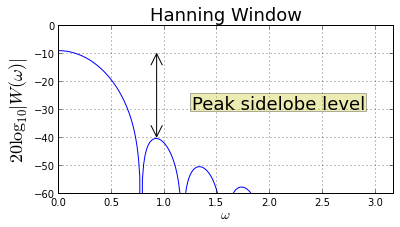

In [11]:
fig, ax = subplots()
fig.set_size_inches((6,3))

Ns= 16
Nf = 256*2
freqs = arange(Nf)*2*pi/Nf
w = signal.hanning(Ns,False)
W = db20(w,Nf) 

ax.plot(freqs,W,'-b',ms=4.)
ax.set_ylim(ymin = -60)
ax.set_xlim(xmax = pi*1.01)
ax.set_xlabel(r'$\omega$',fontsize=14)
ax.set_ylabel(r'$20\log_{10}|W(\omega)|$',fontsize=18)
ax.grid()
ax.set_title('Hanning Window',fontsize=18)
ax.annotate('',fontsize=28,
            xy=(76/Nf*2*pi,W[0]),
            xytext=(76/Nf*2*pi,W[0]-32),
            arrowprops={'facecolor':'b','arrowstyle':'<->'},
            )
ax.text(0.4,0.5,'Peak sidelobe level',
        fontsize=18,
        transform=ax.transAxes,
        bbox={'fc':'y','alpha':.3})

Figure shows the DFT of the Hanning window and how far down the next sidelobe is from the peak ($\approx$ 31 dB). The figure of merit considers the worst-case where an interfering single frequency sits exactly on the peak of this sidelobe.

In [12]:
def peak_sidelobe(w,N=256,return_index=False, return_all=False):
    '''Given window function, return peak sidelobe level and bin index of 
       all (return_all=True) or some sidelobe peaks if desired (return_index=True). 
       Note that this method fails when the window function
       has no roots on the unit circle (e.g. exponential window). The return index
       is in units of DFT-bin (k/N). 
    '''
    assert (len(w)<=N) # need longer DFT otherwise
    r=np.roots(w)      # find complex roots of window function
    r = r[np.where(np.round(abs(r),3)==1)] # keep only those on unit circle (approx)
    y=log(r).imag/2./pi*N     # get k^th bin index
    y=y[y>0].astype(np.int32) # keep positive half only as integer roundoff
    y=np.unique(y)            # dump repeated
    y.sort()                  # sort in-place 
    W = 20*log10(abs(fft.fft(w,N))) #compute DFT
    # loop through slices and pick out max() as peak for that slice's sidelobe
    sidelobe_levels = []
    sidelobe_idx =[]
    for s in [slice(i,j) for i,j in zip(y[:-1],y[1:])]:
        imx= s.start+W[s].argmax() # bin index of max
        peak= W[imx]-W[0]          # relative to global peak
        sidelobe_levels.append( peak ) # store sidelobe level for later
        sidelobe_idx.append(imx/N)       # ... with corresponding bin
    if return_all:
        return zip(sidelobe_levels, sidelobe_idx)
    if return_index:
        return (sidelobe_levels[0], sidelobe_idx[0])
    return sidelobe_levels[0]

def dftmatrix(N=32,Ns=None):
    'construct DFT matrix of size N give Ns time-samples'
    k= np.arange(N)
    if Ns is None: Ns = N
    n = arange(Ns)
    U = matrix(exp(1j* 2*pi/N *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/sqrt(N)

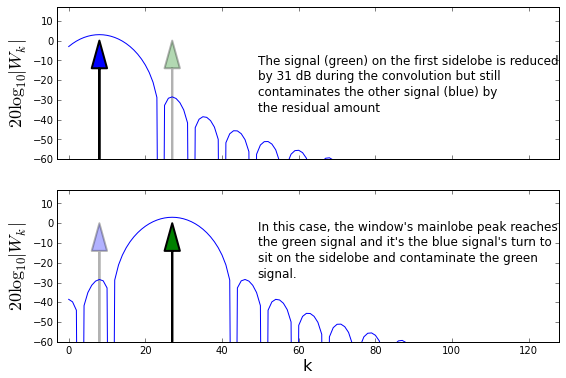

In [13]:
Ns = 64
N= 512

U=dftmatrix(N=N,Ns=Ns)
offset=8 # place DFT near middle of plot for readability
u=array(U[:,offset]).flatten()*sqrt(N) # phase shifts

w = signal.hanning(Ns,False)
level,idx = peak_sidelobe(w,N,return_index=True)
x0 = u*ones(Ns)
x1=u*exp(1j*2*pi*arange(Ns)*(idx))         # signal on peak of sidelobe

fig,axs = subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((9,6))

ax=axs[0]
ax.plot(db20(w*x0,N))
ax.arrow(offset+idx*N,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='g',alpha=0.3)
#ax.arrow( idx*N,0,0,3,length_includes_head=True,lw=1.5,head_width=2,fc='g')
ax.arrow(offset,-60,0,60,
         length_includes_head=True,
         lw=2.,head_length=14,head_width=4,fc='b')
#ax.legend(loc=0)
ax.set_xlim(xmax=N/4.,xmin=-3)
ax.set_ylim(ymax = 17,ymin=-60)
ax.set_ylabel(r'$20\log_{10}|W_k|$',fontsize=18)
ax.text(0.4,.5,'''The signal (green) on the first sidelobe is reduced 
by 31 dB during the convolution but still 
contaminates the other signal (blue) by 
the residual amount''',va='center',fontsize=12,transform=ax.transAxes);

ax=axs[1]
ax.plot(db20(w*x1,N))
ax.arrow(offset+idx*N,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='g')
ax.arrow(offset,-60,0,60,
         length_includes_head=True,lw=2.,
         head_length=14,head_width=4,fc='b',alpha=0.3)
#ax.legend(loc=0)
ax.set_xlim(xmax=N/4.,xmin=-3)
ax.set_ylim(ymax = 17,ymin=-60)
ax.set_ylabel(r'$20\log_{10}|W_k|$',fontsize=18)
ax.set_xlabel('k',fontsize=16)
ax.text(0.4,.6,'''In this case, the window's mainlobe peak reaches 
the green signal and it's the blue signal's turn to 
sit on the sidelobe and contaminate the green 
signal.''',va='center',fontsize=12,transform=ax.transAxes);

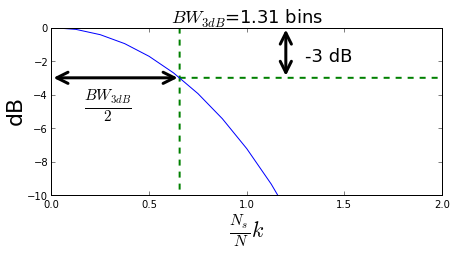

In [14]:
fig,ax = subplots()
fig.set_size_inches((7,3))

N=512
w=signal.windows.hamming(Ns)
W=db20(w,N)

m =10
p=np.polyfit(arange(m)/N*Ns,W[:m]-W[0]+3.01,2) # fit quadratic polynomial
width = np.roots(p)[0]*2 # 3-dB beamwidth

ax.plot(arange(N)/N*Ns,W-W[0]) # normalize to peak
ax.set_ylim(ymin=-10)
ax.set_xlim(xmax = 2)

ax.vlines(width/2,0,-60,lw=2.,linestyle='--',color='g')
ax.set_ylabel('dB',fontsize=22)
ax.set_title(r'$ BW_{3dB}$=%3.2f bins'%width,fontsize=18)
ax.set_xlabel(r'$\frac{N_s}{N} k$',fontsize=22)
ax.annotate('',fontsize=28,xy=(0,-3), 
            xytext=(width/2,-3),
            arrowprops=dict(arrowstyle="<->",lw=3))
ax.annotate('',fontsize=28,xy=(1.2,0), 
            xytext=(1.2,-3),
            arrowprops=dict(arrowstyle="<->",lw=3))
ax.hlines(-3,width/2,2,linestyle='--',color='g',lw=2.)
ax.text( width/2/4,-5,r'$\frac{BW_{3dB}}{2}$',fontsize=22)
ax.text( 1.3,-2,'-3 dB',fontsize=18)

Figure illustrating the concept of 3-dB bandwidth. the distance (in frequency units) between the mainlobe's peak and the point on the mainlobe that is 3 dB down from the peak is half of the 3-dB bandwidth. This metric attempts to quantify how close two nearby tones can be before they become indistinguishable.

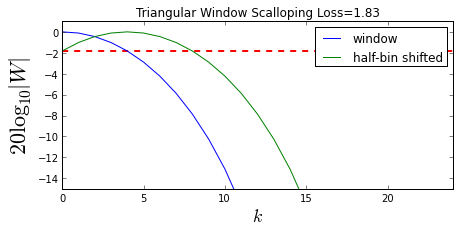

In [15]:
fig,ax = subplots()
fig.set_size_inches((7,3))

N=256
Ns = 32
w=signal.windows.triang(Ns)
W=db20(w,N)

W0 = db20(exp(1j*2*pi/Ns*arange(Ns)*1/2.)*w,N)-W[0]
W=W-W[0] # rescale for plot

ax.plot(W,label='window')
ax.plot(W0,label='half-bin shifted')
scalloping_loss = W[0]-W0[0]
ax.axis(ymin=-15,ymax=1,xmax=24)

ax.set_title('Triangular Window Scalloping Loss=%3.2f'%(scalloping_loss))
ax.set_xlabel('$k$',fontsize=18)
ax.set_ylabel(r'$20\log_{10}|W|$',fontsize=22)
ax.hlines(-scalloping_loss,0,24,color='red',linestyle='--',lw=2.)
ax.legend(loc=0)

Figure illustrating the concept of *scalloping loss*. This metric quantifies the loss that occurs when the DFT index frequency does not match the signal frequency.